# EMOTICON

## Emotion Dectection

In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as path

from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

C:\Users\HP\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
config = tf.ConfigProto( device_count = {'GPU': 1})
#sess = tf.Session(config=config) 
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True))
keras.backend.set_session(sess)

In [3]:
num_classes = 7 
batch_size = 256
epochs = 5

Inserting Dataset

In [4]:
with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))


number of instances:  35888
instance length:  2304


In [5]:
x_train, y_train, x_test, y_test = [], [], [], []
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")  
        val = img.split(" ")
        pixels = np.array(val, 'float32')
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [6]:
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')
print(x_train)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

[[[[0.27450982]
   [0.3137255 ]
   [0.32156864]
   ...
   [0.20392157]
   [0.16862746]
   [0.16078432]]

  [[0.25490198]
   [0.23921569]
   [0.22745098]
   ...
   [0.21960784]
   [0.20392157]
   [0.17254902]]

  [[0.19607843]
   [0.16862746]
   [0.21176471]
   ...
   [0.19215687]
   [0.21960784]
   [0.18431373]]

  ...

  [[0.35686275]
   [0.25490198]
   [0.16470589]
   ...
   [0.28235295]
   [0.21960784]
   [0.16862746]]

  [[0.3019608 ]
   [0.32156864]
   [0.30980393]
   ...
   [0.4117647 ]
   [0.27450982]
   [0.18039216]]

  [[0.3019608 ]
   [0.28235295]
   [0.32941177]
   ...
   [0.41568628]
   [0.42745098]
   [0.32156864]]]


 [[[0.5921569 ]
   [0.5882353 ]
   [0.5764706 ]
   ...
   [0.5058824 ]
   [0.54901963]
   [0.47058824]]

  [[0.5921569 ]
   [0.58431375]
   [0.58431375]
   ...
   [0.47843137]
   [0.5529412 ]
   [0.5372549 ]]

  [[0.5921569 ]
   [0.5921569 ]
   [0.6117647 ]
   ...
   [0.42745098]
   [0.48235294]
   [0.57254905]]

  ...

  [[0.7372549 ]
   [0.7372549 ]
   [0.4

Construction of CNN

In [7]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2)) 

model.add(Dense(7, activation='softmax'))

In [8]:
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [20]:
fit = True

if fit == True:             
    model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=10)
else:
	print('fit not true')

Epoch 1/10
256/256 [==============================] - 69s 270ms/step - loss: 1.0611 - acc: 0.5989
Epoch 2/10
256/256 [==============================] - 69s 269ms/step - loss: 0.9912 - acc: 0.6283
Epoch 3/10
256/256 [==============================] - 69s 269ms/step - loss: 0.9345 - acc: 0.6489
Epoch 4/10
256/256 [==============================] - 69s 270ms/step - loss: 0.8682 - acc: 0.6750
Epoch 5/10
256/256 [==============================] - 69s 270ms/step - loss: 0.8122 - acc: 0.6970
Epoch 6/10
256/256 [==============================] - 69s 269ms/step - loss: 0.7467 - acc: 0.7218
Epoch 7/10
256/256 [==============================] - 69s 270ms/step - loss: 0.6868 - acc: 0.7453
Epoch 8/10
256/256 [==============================] - 69s 270ms/step - loss: 0.6240 - acc: 0.7697
Epoch 9/10
256/256 [==============================] - 69s 270ms/step - loss: 0.5780 - acc: 0.7860
Epoch 10/10
256/256 [==============================] - 69s 269ms/step - loss: 0.5269 - acc: 0.8035


In [21]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

3589/3589 [==============================] - 2s 467us/step
Test loss: 1.689154781415689
Test accuracy: 56.06018389855696


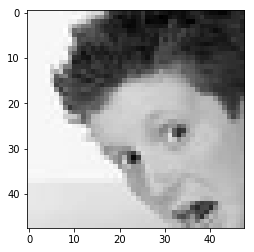

[0.34860078 0.00739188 0.19414368 0.03251107 0.1911059  0.13070229
 0.09554442]


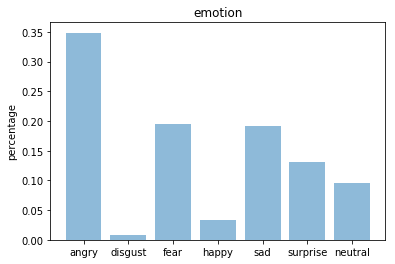

----------------------------------------------


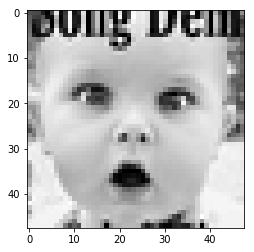

[7.6378364e-04 9.8673918e-06 1.2879629e-02 1.0425443e-03 1.4983478e-04
 9.8502296e-01 1.3145448e-04]


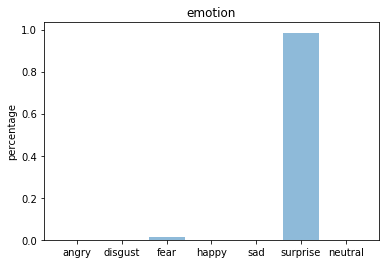

----------------------------------------------


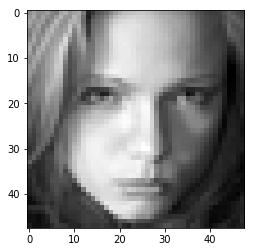

[0.5255254  0.01910176 0.09627967 0.00780333 0.21387851 0.00276652
 0.13464479]


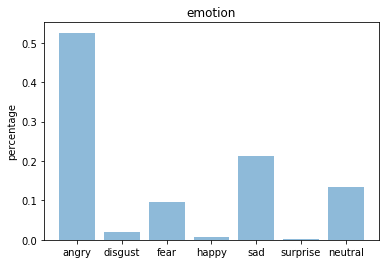

----------------------------------------------


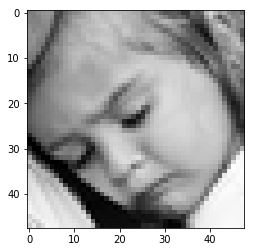

[0.03745249 0.00172583 0.1794017  0.01400154 0.66577804 0.00132738
 0.10031307]


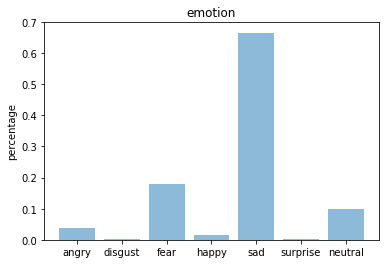

----------------------------------------------


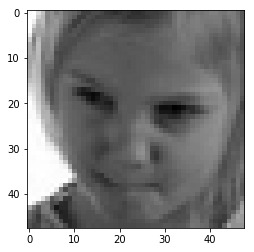

[0.64068556 0.0230129  0.07543478 0.00960267 0.13631457 0.00335291
 0.11159661]


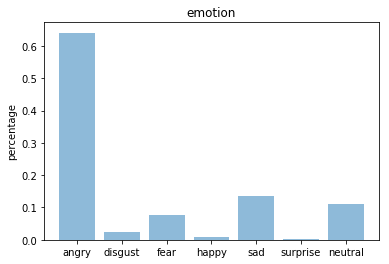

----------------------------------------------


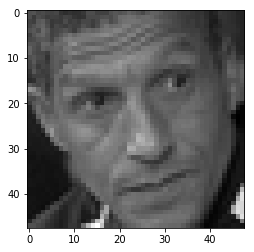

[0.14214045 0.00406349 0.0819637  0.0233443  0.29537115 0.00641656
 0.4467004 ]


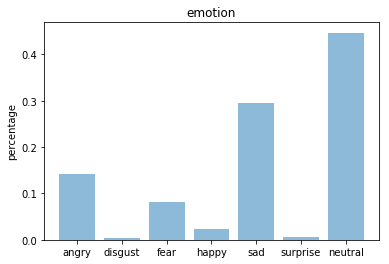

----------------------------------------------


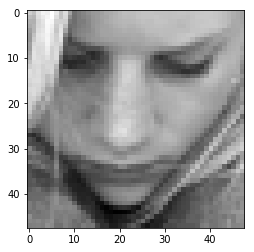

[0.06376484 0.02896028 0.20226453 0.01870108 0.61942047 0.00250862
 0.06438024]


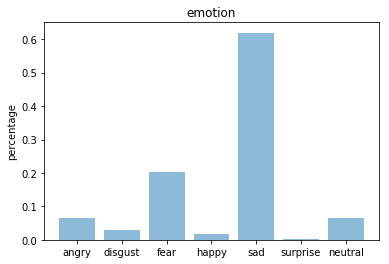

----------------------------------------------


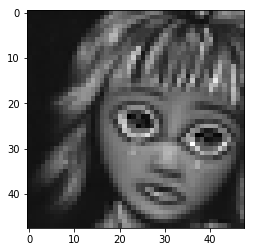

[0.08786102 0.00054118 0.07301533 0.16335426 0.19592229 0.01717056
 0.46213531]


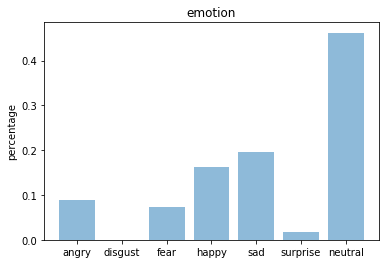

----------------------------------------------


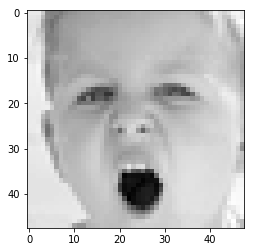

[0.2533006  0.00151416 0.0587442  0.00677531 0.00560035 0.6705835
 0.0034819 ]


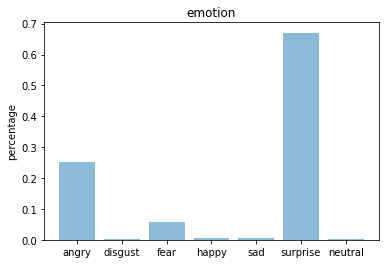

----------------------------------------------


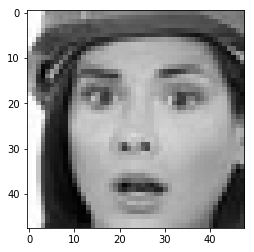

[4.2201700e-03 4.7752002e-04 1.2375897e-01 9.7176264e-04 4.4804080e-03
 8.6405927e-01 2.0319496e-03]


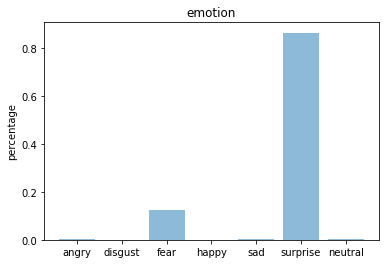

----------------------------------------------


In [13]:
monitor_testset_results = True

if monitor_testset_results == True:
	predictions = model.predict(x_test)
	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1


In [12]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()



Testing

C:\Users\HP\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


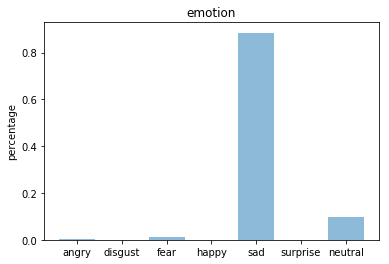

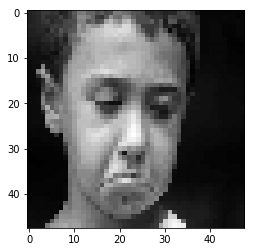

In [26]:
img = image.load_img("examples/10.jpg", grayscale=True, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(x)
plt.show()